# Boston House Price Prediction with ML Models

by 1辰

## Import the required libraries

In [1]:
# Basic libraries
import pandas as pd # 用于处理数据的工具
from tqdm import tqdm # 显示循环的进度条工具
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Machine learning libraries (from sklearn)

# Preprocessing
from sklearn.preprocessing import StandardScaler

# Linear regression
from sklearn.linear_model import LinearRegression 

# Regularization
from sklearn.linear_model import Ridge   
from sklearn.linear_model import Lasso  
from sklearn.linear_model import ElasticNet  

# Import library for pipeline
from sklearn.pipeline import make_pipeline

# Non-linear regression
from sklearn.neighbors import KNeighborsRegressor  
from sklearn.tree import DecisionTreeRegressor   
from sklearn.svm import SVR  # Support Vector regression


# Ensemble
from sklearn.ensemble import AdaBoostRegressor   
from sklearn.ensemble import GradientBoostingRegressor  
from sklearn.ensemble import RandomForestRegressor   
from sklearn.ensemble import ExtraTreesRegressor

# lightgbm, catboost, xgboost
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from xgboost import XGBRegressor

# Model evaluation
from sklearn.model_selection import train_test_split  # 拆分训练集与验证集工具
from sklearn.model_selection import KFold  
from sklearn.model_selection import cross_val_score   

# Evaluation metrics
from sklearn.metrics import mean_squared_error # 评分 MSE 的计算函数

## Load the dataset

In [5]:
# 数据准备
train_dataset = pd.read_csv("../data/train_dataset.csv") # 原始训练数据。
test_dataset = pd.read_csv("../data/test_dataset.csv") # 原始测试数据。
sampleSubmission = pd.read_csv('../data/SampleSubmission.csv')# 提交样例。

submit = pd.DataFrame() # 定义提交的最终数据。
submit["ID"] = sampleSubmission["ID"] # 对齐测试数据的序号。


## Exploratory Data Analysis

In [6]:
# data shape
train_dataset.shape, test_dataset.shape

((455, 14), (50, 14))

In [7]:
# data type
train_dataset.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX          int64
PIRATIO    float64
B          float64
LSTAT      float64
PRICE      float64
dtype: object

In [8]:
# Statistical Features of data
train_dataset.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PIRATIO,B,LSTAT,PRICE
count,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000
mean,3.989784,10.912088,11.664110,0.072527,0.561758,6.263266,70.344835,3.664227,10.092308,420.778022,18.519780,353.272593,12.963385,22.212308
std,8.993398,23.130233,6.974787,0.259645,0.118627,0.704493,27.697196,2.118137,9.002217,172.326926,2.165215,95.557626,7.239069,9.241754
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,6.500000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.084170,0.000000,5.190000,0.000000,0.453000,5.877500,47.200000,2.005550,4.000000,281.000000,17.400000,372.860000,7.205000,16.450000
50%,0.289600,0.000000,10.010000,0.000000,0.538000,6.193000,81.300000,2.894400,5.000000,358.000000,19.100000,391.450000,11.690000,20.800000
75%,4.548895,0.000000,18.100000,0.000000,0.647000,6.611000,94.650000,4.812200,24.000000,666.000000,20.200000,396.375000,17.200000,24.800000
max,88.976200,95.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [9]:
train_dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PIRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9


In [10]:
test_dataset.head()

,ID,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PIRATIO,B,LSTAT
0,1,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33
1,2,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21
2,3,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43
3,4,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15
4,5,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93


In [11]:
submit.head()

,ID
0,id_1
1,id_2
2,id_3
3,id_4
4,id_5


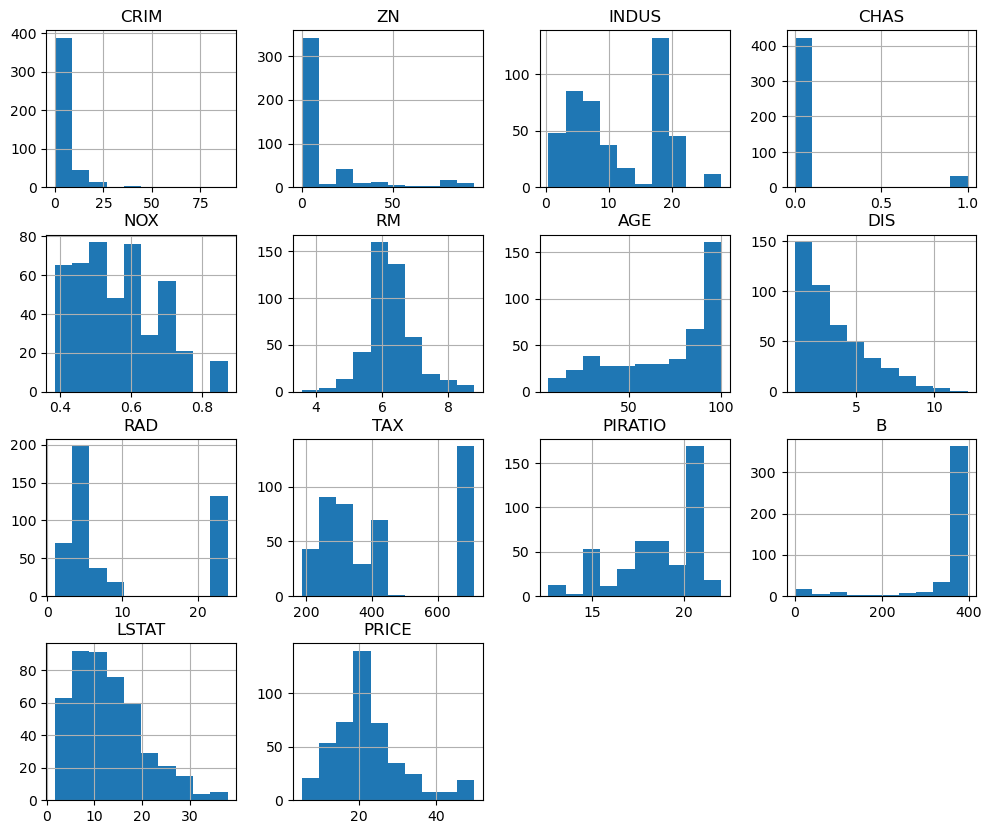

In [12]:
import matplotlib.pyplot as plt
# Variables distribution (histogram)
train_dataset.hist(figsize=[12,10])
plt.show()

### Correlation Matrix

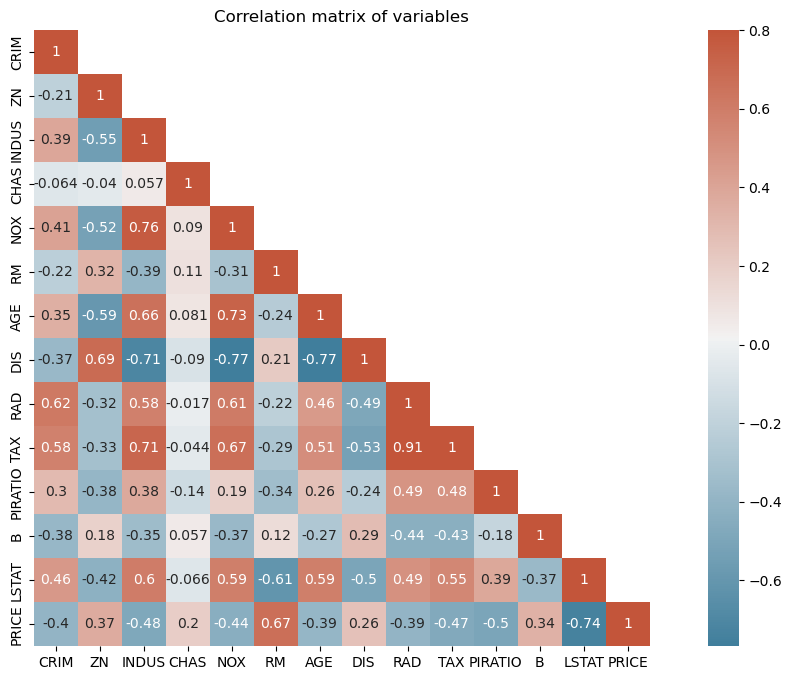

In [13]:
# Compute the correlation matrix
correlations=train_dataset.corr()
# Generate a mask for the upper triangle
mask=np.array(correlations)
mask[np.tril_indices_from(mask)]=False
# Set up the matplotlib figure
fig,ax=plt.subplots(figsize=(15,8))
# Heat map for correlation matrix of variables
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(correlations,cmap=cmap,mask=mask,vmax=0.8,square=True,annot=True,ax=ax)
ax.set_title('Correlation matrix of variables')
plt.show()

## Data Preprocess

### Drop the 'ID' Feature of Test Set

In [14]:
test_dataset = test_dataset.drop(columns=["ID"]) # 测试数据中去掉序号列。
print(test_dataset.shape) # 查看测试数据的大小。
test_dataset.head()

(50, 13)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PIRATIO,B,LSTAT
0,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33
1,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21
2,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43
3,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15
4,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93


### Split the features and label of train set

In [15]:
X_train = train_dataset.drop(columns=["PRICE"]) # 训练数据中去掉目标列。
y_train = train_dataset["PRICE"] # 目标列。

In [16]:
X_train.shape, y_train.shape

((455, 13), (455,))

In [17]:
X_train.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PIRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10


In [18]:
y_train.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    18.9
Name: PRICE, dtype: float64

## Evaluate different ML algorithms in Cross Validation

> Cross-validation (CV) is a technique to evaluate predictive models by partitioning the original sample into a training set to train the model, and a test set to evaluate it.

In [20]:
# Set the pool of Machine Learning Pipelines to evaluate (scaler + ML algorithm)
pipelines = []
pipelines.append(('pipLinearReg', make_pipeline(StandardScaler(), LinearRegression())))
pipelines.append(('pipRidge', make_pipeline(StandardScaler(), Ridge())))
pipelines.append(('pipLasso', make_pipeline(StandardScaler(), Lasso())))
pipelines.append(('pipElasticNet', make_pipeline(StandardScaler(), ElasticNet())))
pipelines.append(('pipKNN', make_pipeline(StandardScaler(), KNeighborsRegressor())))
pipelines.append(('pipRegTrees', make_pipeline(StandardScaler(), DecisionTreeRegressor())))
pipelines.append(('pipSVR', make_pipeline(StandardScaler(), SVR())))
pipelines.append(('pipABst', make_pipeline(StandardScaler(), AdaBoostRegressor())))
pipelines.append(('pipGrBst', make_pipeline(StandardScaler(), GradientBoostingRegressor())))
pipelines.append(('pipRF', make_pipeline(StandardScaler(), RandomForestRegressor())))
pipelines.append(('pipET', make_pipeline(StandardScaler(), ExtraTreesRegressor())))
pipelines.append(('pipLGBM', make_pipeline(StandardScaler(), LGBMRegressor())))
pipelines.append(('pipCatBst', make_pipeline(StandardScaler(), CatBoostRegressor())))
pipelines.append(('pipXBG', make_pipeline(StandardScaler(), XGBRegressor())))


In [22]:
# Evaluate each ML pipeline in 10-fold cross validation
results = []
names = []

# Generate the 10-fold partitioning
n_splits = 10 # 10-fold cross-validation
seed = 32 # for reproducibility    
kfold = KFold(n_splits=10, random_state=seed, shuffle=True)  

# Evaluate each pipeline in cross validation with train data
for pipelinename, pipeline in pipelines:
    cv_results = cross_val_score(pipeline, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error')
    results.append(cv_results)
    names.append(pipelinename)
    print("{}: {} ({})".format(pipelinename, cv_results.mean(), cv_results.std()))

pipLinearReg: -24.53247501759615 (7.962694562788317)
pipRidge: -24.53168721520487 (8.003341665977993)
pipLasso: -31.114171299617862 (10.446333405789543)
pipElasticNet: -32.50630928324298 (12.324495679085281)
pipKNN: -22.081893314009665 (7.744338065686358)
pipRegTrees: -19.36622995169082 (8.75297559733483)
pipSVR: -31.33338060154882 (13.00147051441118)
pipABst: -14.96530595259836 (4.684780576897595)
pipGrBst: -8.518507841273463 (2.932870634337183)
pipRF: -10.73891608362319 (3.207800587668413)
pipET: -10.050564937922703 (4.496190304734587)
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000242 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 985
[LightGBM] [Info] Number of data points in the train set: 409, number of used features: 13
[LightGBM] [Info] Start training from score 22.047433
[LightGBM] [Warning] No further splits with posit

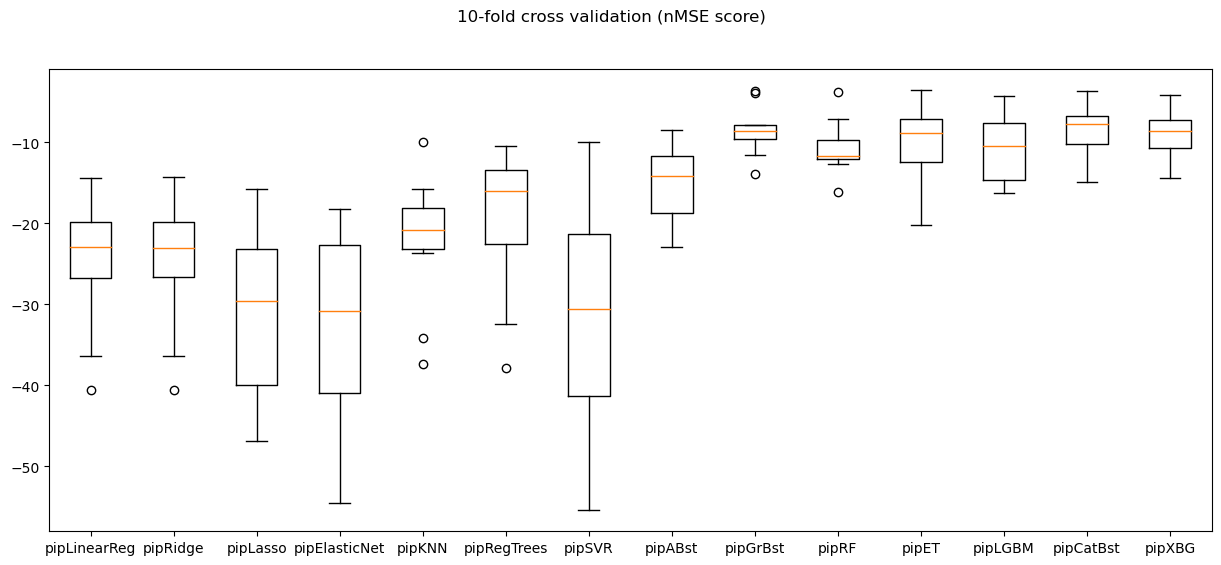

In [23]:
# Cross Validation Results (grafically)
fig = plt.figure(figsize=[15,6])
fig.suptitle('10-fold cross validation (nMSE score)')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

<Note:> The results show the CatBoostRegressor (CatBST) is the best model.

## Train the best Model and Predict with the Model

### CatBoostRegressor

In [24]:
# Fit the best model with the train data
pipeline = make_pipeline(StandardScaler(), CatBoostRegressor()) 
pipeline.fit(X_train, y_train)

Learning rate set to 0.036153
0:	learn: 9.0384608	total: 1.62ms	remaining: 1.62s
1:	learn: 8.8568118	total: 2.94ms	remaining: 1.46s
2:	learn: 8.6572899	total: 3.89ms	remaining: 1.29s
3:	learn: 8.4879079	total: 4.8ms	remaining: 1.2s
4:	learn: 8.3177900	total: 5.73ms	remaining: 1.14s
5:	learn: 8.1464275	total: 6.79ms	remaining: 1.12s
6:	learn: 7.9794024	total: 7.73ms	remaining: 1.1s
7:	learn: 7.8235993	total: 8.91ms	remaining: 1.1s
8:	learn: 7.6767115	total: 9.98ms	remaining: 1.1s
9:	learn: 7.5148991	total: 10.9ms	remaining: 1.08s
10:	learn: 7.3622531	total: 12ms	remaining: 1.07s
11:	learn: 7.2212728	total: 12.9ms	remaining: 1.06s
12:	learn: 7.0774728	total: 13.8ms	remaining: 1.05s
13:	learn: 6.9390654	total: 14.7ms	remaining: 1.03s
14:	learn: 6.8126887	total: 15.5ms	remaining: 1.02s
15:	learn: 6.6871004	total: 16.4ms	remaining: 1.01s
16:	learn: 6.5605442	total: 17.4ms	remaining: 1.01s
17:	learn: 6.4469897	total: 18.5ms	remaining: 1.01s
18:	learn: 6.3315176	total: 19.5ms	remaining: 1.01s

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('catboostregressor',
                 <catboost.core.CatBoostRegressor object at 0x000001CD000D99F0>)])

In [ ]:
y_predicted = pipeline.predict(test_dataset) # output predicted with test data
# save predicted label of test set to submit_result.csv
submit['value'] = y_predicted
submit.to_csv('./data/submit_CatBst.csv', index=False)
print(submit.shape)
submit.head()

(50, 2)


,ID,value
0,id_1,31.190869
1,id_2,25.015987
2,id_3,20.257738
3,id_4,17.512056
4,id_5,15.254442


### XGBRegressor

In [ ]:
# Train the best model with the optimized hyperparameters 
pipeline = make_pipeline(StandardScaler(), XGBRegressor(max_depth=5, n_estimators=50)) 
pipeline.fit(X_train, y_train)
y_predicted = pipeline.predict(test_dataset)

# save predicted label of test set to submit_result.csv
submit['value'] = y_predicted
submit.to_csv('./data/submit_XGB.csv', index=False)
print(submit.shape)
submit.head()
# print("MAE:", mean_absolute_error(y_test, y_predicted))
# print("MSE:", mean_squared_error(y_test, y_predicted))
# print("RMSE:", np.sqrt(mean_squared_error(y_test, y_predicted)))
# print("R2 score:", r2_score(y_test, y_predicted))

(50, 2)


,ID,value
0,id_1,32.452866
1,id_2,23.337328
2,id_3,20.259789
3,id_4,16.679855
4,id_5,15.979762


### GradientBoostingRegressor

In [40]:
# Train the best model with the optimized hyperparameters 
pipeline = make_pipeline(StandardScaler(), GradientBoostingRegressor()) 
pipeline.fit(X_train, y_train)
y_predicted = pipeline.predict(test_dataset)

# save predicted label of test set to submit_result.csv
submit['value'] = y_predicted
submit.to_csv('submit_GBR.csv', index=False)
print(submit.shape)
submit.head()

(50, 2)


,ID,value
0,id_1,33.306903
1,id_2,23.925871
2,id_3,20.182033
3,id_4,17.768301
4,id_5,15.042175


## Prediction Plot of Train Set

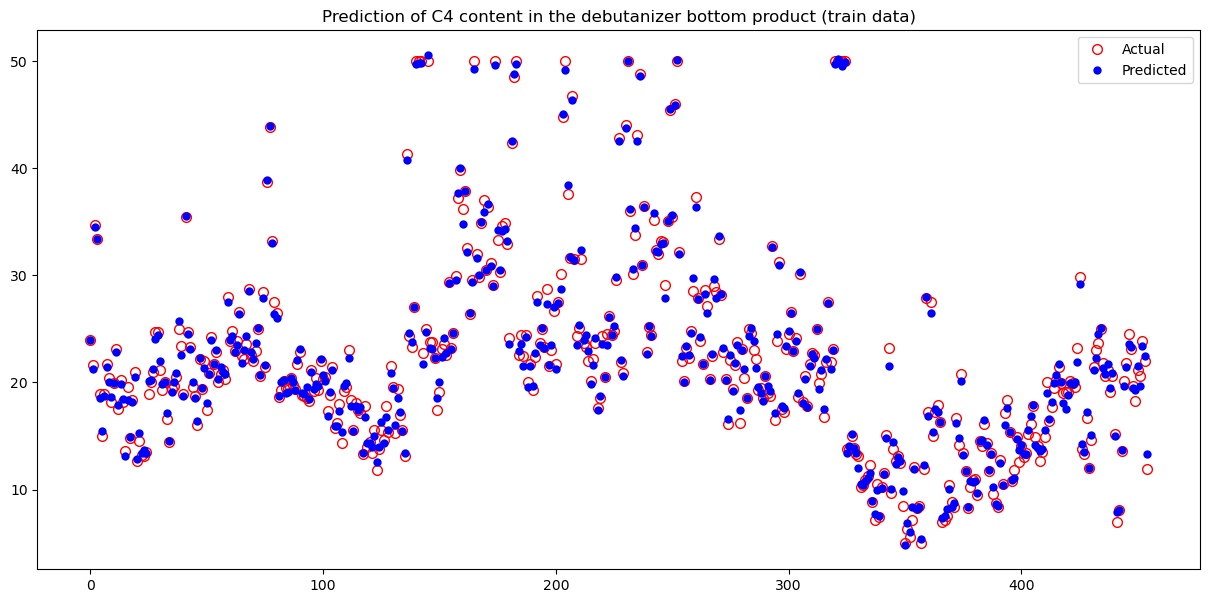

In [ ]:
# Prediction of C4 content in the debutanizer bottom product (train data)
y_predicted_train = pipeline.predict(X_train)
fig, ax = plt.subplots(figsize=(15,7))
ax.plot(y_train, linestyle='none', marker='o',markeredgecolor='r' ,markerfacecolor='none', markersize=7)
ax.plot(y_predicted_train, linestyle='none', marker='o', markeredgecolor='none',markerfacecolor='blue')
ax.legend(['Actual','Predicted'])
plt.title('Prediction of C4 content in the debutanizer bottom product (train data)')
plt.show()

## Hyperparameter Optimization

In [29]:
# Load the grid search library
from sklearn.model_selection import GridSearchCV
# parameters = {'max_depth':(1,2,3,4,5,6,7,8,9,10),
#     'min_samples_split': (1, 2, 3),
#     'min_samples_leaf': (1, 2, 3)
# }
# Set the values of the hyperparameters to be tested
parameter_grid = dict(max_depth=np.array([5,10,15]), 
                      n_estimators=np.array([20,50,100])) 

# Set the 10-fold CV to evaluate each hyperparameter
seed = 42   
kfold = KFold(n_splits=10, random_state=seed, shuffle=True)  

# Set the model 
model = GradientBoostingRegressor(random_state=seed)

# Set the grid seach in cross validation 
grid = GridSearchCV(estimator=model, param_grid=parameter_grid, scoring='neg_mean_squared_error', cv=kfold)
grid_result = grid.fit(X_train, y_train)

# Grid search results
print("Best MSE score: %f with hyperparameter %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best MSE score: -9.172731 with hyperparameter {'max_depth': 5, 'n_estimators': 100}
-11.947472 (4.757886) with: {'max_depth': 5, 'n_estimators': 20}
-9.482700 (4.542109) with: {'max_depth': 5, 'n_estimators': 50}
-9.172731 (4.411153) with: {'max_depth': 5, 'n_estimators': 100}
-13.681523 (5.250903) with: {'max_depth': 10, 'n_estimators': 20}
-13.209491 (6.057262) with: {'max_depth': 10, 'n_estimators': 50}
-13.232440 (6.108485) with: {'max_depth': 10, 'n_estimators': 100}
-15.829669 (5.019142) with: {'max_depth': 15, 'n_estimators': 20}
-16.034044 (5.643484) with: {'max_depth': 15, 'n_estimators': 50}
-16.094755 (5.687924) with: {'max_depth': 15, 'n_estimators': 100}


In [30]:
import optuna

def objective(trial):
    # 指定要调整的超参数范围
    n_estimators = trial.suggest_int('n_estimators', 50, 500)
    max_depth = trial.suggest_int('max_depth', 3, 10)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 15)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 15)
    learning_rate = trial.suggest_uniform('learning_rate', 0.01, 0.1)

    # 创建并训练模型
    model = GradientBoostingRegressor(
        n_estimators=n_estimators, 
        max_depth=max_depth, 
        min_samples_split=min_samples_split, 
        min_samples_leaf=min_samples_leaf, 
        learning_rate=learning_rate,
        random_state=0
    )
    model.fit(X_train, y_train)

    # 使用交叉验证评估模型
    score = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error').mean()
    print(f'n_estimators={n_estimators}, max_depth={max_depth}, min_samples_split={min_samples_split}, min_samples_leaf={min_samples_leaf}, learning_rate={learning_rate}, score={score}')
    return score

# 创建一个study对象并找到最优超参数
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

# 打印最优超参数
print(study.best_trial.params)


[I 2024-04-24 14:16:50,620] A new study created in memory with name: no-name-31e3260a-19ec-4851-ac45-e896ce726a12
[I 2024-04-24 14:16:53,332] Trial 0 finished with value: -23.316434863345222 and parameters: {'n_estimators': 236, 'max_depth': 7, 'min_samples_split': 14, 'min_samples_leaf': 8, 'learning_rate': 0.09916329395522727}. Best is trial 0 with value: -23.316434863345222.


n_estimators=236, max_depth=7, min_samples_split=14, min_samples_leaf=8, learning_rate=0.09916329395522727, score=-23.316434863345222


[I 2024-04-24 14:16:58,781] Trial 1 finished with value: -25.433924469802218 and parameters: {'n_estimators': 360, 'max_depth': 9, 'min_samples_split': 11, 'min_samples_leaf': 2, 'learning_rate': 0.066566139313385}. Best is trial 0 with value: -23.316434863345222.


n_estimators=360, max_depth=9, min_samples_split=11, min_samples_leaf=2, learning_rate=0.066566139313385, score=-25.433924469802218


[I 2024-04-24 14:17:01,753] Trial 2 finished with value: -22.854015672334448 and parameters: {'n_estimators': 377, 'max_depth': 4, 'min_samples_split': 15, 'min_samples_leaf': 8, 'learning_rate': 0.0293134726494549}. Best is trial 2 with value: -22.854015672334448.


n_estimators=377, max_depth=4, min_samples_split=15, min_samples_leaf=8, learning_rate=0.0293134726494549, score=-22.854015672334448


[I 2024-04-24 14:17:07,407] Trial 3 finished with value: -24.409669367858243 and parameters: {'n_estimators': 472, 'max_depth': 10, 'min_samples_split': 12, 'min_samples_leaf': 15, 'learning_rate': 0.04963325724261659}. Best is trial 2 with value: -22.854015672334448.


n_estimators=472, max_depth=10, min_samples_split=12, min_samples_leaf=15, learning_rate=0.04963325724261659, score=-24.409669367858243


[I 2024-04-24 14:17:09,186] Trial 4 finished with value: -23.832032417313165 and parameters: {'n_estimators': 188, 'max_depth': 5, 'min_samples_split': 2, 'min_samples_leaf': 7, 'learning_rate': 0.0937549980636225}. Best is trial 2 with value: -22.854015672334448.


n_estimators=188, max_depth=5, min_samples_split=2, min_samples_leaf=7, learning_rate=0.0937549980636225, score=-23.832032417313165


[I 2024-04-24 14:17:14,643] Trial 5 finished with value: -22.433769152717808 and parameters: {'n_estimators': 446, 'max_depth': 7, 'min_samples_split': 12, 'min_samples_leaf': 6, 'learning_rate': 0.0865555514743977}. Best is trial 5 with value: -22.433769152717808.


n_estimators=446, max_depth=7, min_samples_split=12, min_samples_leaf=6, learning_rate=0.0865555514743977, score=-22.433769152717808


[I 2024-04-24 14:17:16,464] Trial 6 finished with value: -23.68139512965192 and parameters: {'n_estimators': 171, 'max_depth': 8, 'min_samples_split': 14, 'min_samples_leaf': 15, 'learning_rate': 0.03843912393233098}. Best is trial 5 with value: -22.433769152717808.


n_estimators=171, max_depth=8, min_samples_split=14, min_samples_leaf=15, learning_rate=0.03843912393233098, score=-23.68139512965192


[I 2024-04-24 14:17:19,234] Trial 7 finished with value: -22.81210701296889 and parameters: {'n_estimators': 253, 'max_depth': 8, 'min_samples_split': 15, 'min_samples_leaf': 13, 'learning_rate': 0.04083969236640573}. Best is trial 5 with value: -22.433769152717808.


n_estimators=253, max_depth=8, min_samples_split=15, min_samples_leaf=13, learning_rate=0.04083969236640573, score=-22.81210701296889


[I 2024-04-24 14:17:21,207] Trial 8 finished with value: -21.837343140956914 and parameters: {'n_estimators': 308, 'max_depth': 3, 'min_samples_split': 7, 'min_samples_leaf': 4, 'learning_rate': 0.0822526679157684}. Best is trial 8 with value: -21.837343140956914.


n_estimators=308, max_depth=3, min_samples_split=7, min_samples_leaf=4, learning_rate=0.0822526679157684, score=-21.837343140956914


[I 2024-04-24 14:17:28,700] Trial 9 finished with value: -23.946108618426518 and parameters: {'n_estimators': 448, 'max_depth': 9, 'min_samples_split': 5, 'min_samples_leaf': 4, 'learning_rate': 0.024194973534387768}. Best is trial 8 with value: -21.837343140956914.


n_estimators=448, max_depth=9, min_samples_split=5, min_samples_leaf=4, learning_rate=0.024194973534387768, score=-23.946108618426518


[I 2024-04-24 14:17:29,524] Trial 10 finished with value: -22.04243407156969 and parameters: {'n_estimators': 62, 'max_depth': 3, 'min_samples_split': 7, 'min_samples_leaf': 1, 'learning_rate': 0.07217778106989606}. Best is trial 8 with value: -21.837343140956914.


n_estimators=62, max_depth=3, min_samples_split=7, min_samples_leaf=1, learning_rate=0.07217778106989606, score=-22.04243407156969


[I 2024-04-24 14:17:30,192] Trial 11 finished with value: -22.491966535160252 and parameters: {'n_estimators': 51, 'max_depth': 3, 'min_samples_split': 7, 'min_samples_leaf': 1, 'learning_rate': 0.06952812749982416}. Best is trial 8 with value: -21.837343140956914.


n_estimators=51, max_depth=3, min_samples_split=7, min_samples_leaf=1, learning_rate=0.06952812749982416, score=-22.491966535160252


[I 2024-04-24 14:17:31,788] Trial 12 finished with value: -21.511850697623657 and parameters: {'n_estimators': 125, 'max_depth': 3, 'min_samples_split': 8, 'min_samples_leaf': 4, 'learning_rate': 0.07552570963025389}. Best is trial 12 with value: -21.511850697623657.


n_estimators=125, max_depth=3, min_samples_split=8, min_samples_leaf=4, learning_rate=0.07552570963025389, score=-21.511850697623657


[I 2024-04-24 14:17:37,044] Trial 13 finished with value: -22.38907963892199 and parameters: {'n_estimators': 332, 'max_depth': 5, 'min_samples_split': 9, 'min_samples_leaf': 5, 'learning_rate': 0.08229714662026687}. Best is trial 12 with value: -21.511850697623657.


n_estimators=332, max_depth=5, min_samples_split=9, min_samples_leaf=5, learning_rate=0.08229714662026687, score=-22.38907963892199


[I 2024-04-24 14:17:39,826] Trial 14 finished with value: -22.680640707210472 and parameters: {'n_estimators': 154, 'max_depth': 5, 'min_samples_split': 4, 'min_samples_leaf': 4, 'learning_rate': 0.05847951685682552}. Best is trial 12 with value: -21.511850697623657.


n_estimators=154, max_depth=5, min_samples_split=4, min_samples_leaf=4, learning_rate=0.05847951685682552, score=-22.680640707210472


[I 2024-04-24 14:17:43,971] Trial 15 finished with value: -23.040618440274436 and parameters: {'n_estimators': 316, 'max_depth': 4, 'min_samples_split': 9, 'min_samples_leaf': 11, 'learning_rate': 0.01018818176868904}. Best is trial 12 with value: -21.511850697623657.


n_estimators=316, max_depth=4, min_samples_split=9, min_samples_leaf=11, learning_rate=0.01018818176868904, score=-23.040618440274436


[I 2024-04-24 14:17:45,403] Trial 16 finished with value: -22.033256416160494 and parameters: {'n_estimators': 114, 'max_depth': 3, 'min_samples_split': 7, 'min_samples_leaf': 10, 'learning_rate': 0.08293265784950508}. Best is trial 12 with value: -21.511850697623657.


n_estimators=114, max_depth=3, min_samples_split=7, min_samples_leaf=10, learning_rate=0.08293265784950508, score=-22.033256416160494


[I 2024-04-24 14:17:48,723] Trial 17 finished with value: -23.314778013973534 and parameters: {'n_estimators': 222, 'max_depth': 4, 'min_samples_split': 5, 'min_samples_leaf': 3, 'learning_rate': 0.07815812025784223}. Best is trial 12 with value: -21.511850697623657.


n_estimators=222, max_depth=4, min_samples_split=5, min_samples_leaf=3, learning_rate=0.07815812025784223, score=-23.314778013973534


[I 2024-04-24 14:17:53,693] Trial 18 finished with value: -22.87584139545955 and parameters: {'n_estimators': 273, 'max_depth': 6, 'min_samples_split': 10, 'min_samples_leaf': 6, 'learning_rate': 0.06288116159444077}. Best is trial 12 with value: -21.511850697623657.


n_estimators=273, max_depth=6, min_samples_split=10, min_samples_leaf=6, learning_rate=0.06288116159444077, score=-22.87584139545955


[I 2024-04-24 14:18:00,502] Trial 19 finished with value: -22.635888568400144 and parameters: {'n_estimators': 395, 'max_depth': 6, 'min_samples_split': 8, 'min_samples_leaf': 10, 'learning_rate': 0.07618236010955932}. Best is trial 12 with value: -21.511850697623657.


n_estimators=395, max_depth=6, min_samples_split=8, min_samples_leaf=10, learning_rate=0.07618236010955932, score=-22.635888568400144


[I 2024-04-24 14:18:02,300] Trial 20 finished with value: -23.54364296314697 and parameters: {'n_estimators': 120, 'max_depth': 4, 'min_samples_split': 3, 'min_samples_leaf': 3, 'learning_rate': 0.09111296725175305}. Best is trial 12 with value: -21.511850697623657.


n_estimators=120, max_depth=4, min_samples_split=3, min_samples_leaf=3, learning_rate=0.09111296725175305, score=-23.54364296314697


[I 2024-04-24 14:18:03,490] Trial 21 finished with value: -22.050144758932994 and parameters: {'n_estimators': 106, 'max_depth': 3, 'min_samples_split': 6, 'min_samples_leaf': 10, 'learning_rate': 0.08269949717308188}. Best is trial 12 with value: -21.511850697623657.


n_estimators=106, max_depth=3, min_samples_split=6, min_samples_leaf=10, learning_rate=0.08269949717308188, score=-22.050144758932994


[I 2024-04-24 14:18:04,730] Trial 22 finished with value: -22.399168710097324 and parameters: {'n_estimators': 112, 'max_depth': 3, 'min_samples_split': 7, 'min_samples_leaf': 12, 'learning_rate': 0.07439389326277224}. Best is trial 12 with value: -21.511850697623657.


n_estimators=112, max_depth=3, min_samples_split=7, min_samples_leaf=12, learning_rate=0.07439389326277224, score=-22.399168710097324


[I 2024-04-24 14:18:07,211] Trial 23 finished with value: -22.492739311732546 and parameters: {'n_estimators': 204, 'max_depth': 3, 'min_samples_split': 8, 'min_samples_leaf': 9, 'learning_rate': 0.08982593176686124}. Best is trial 12 with value: -21.511850697623657.


n_estimators=204, max_depth=3, min_samples_split=8, min_samples_leaf=9, learning_rate=0.08982593176686124, score=-22.492739311732546


[I 2024-04-24 14:18:11,381] Trial 24 finished with value: -22.685970199232887 and parameters: {'n_estimators': 308, 'max_depth': 4, 'min_samples_split': 6, 'min_samples_leaf': 6, 'learning_rate': 0.08182151288943348}. Best is trial 12 with value: -21.511850697623657.


n_estimators=308, max_depth=4, min_samples_split=6, min_samples_leaf=6, learning_rate=0.08182151288943348, score=-22.685970199232887


[I 2024-04-24 14:18:13,743] Trial 25 finished with value: -22.122996174232334 and parameters: {'n_estimators': 136, 'max_depth': 5, 'min_samples_split': 10, 'min_samples_leaf': 4, 'learning_rate': 0.09898490765301404}. Best is trial 12 with value: -21.511850697623657.


n_estimators=136, max_depth=5, min_samples_split=10, min_samples_leaf=4, learning_rate=0.09898490765301404, score=-22.122996174232334


[I 2024-04-24 14:18:16,720] Trial 26 finished with value: -22.027317965765178 and parameters: {'n_estimators': 272, 'max_depth': 3, 'min_samples_split': 6, 'min_samples_leaf': 13, 'learning_rate': 0.06439524579289775}. Best is trial 12 with value: -21.511850697623657.


n_estimators=272, max_depth=3, min_samples_split=6, min_samples_leaf=13, learning_rate=0.06439524579289775, score=-22.027317965765178


[I 2024-04-24 14:18:20,222] Trial 27 finished with value: -22.044121330693763 and parameters: {'n_estimators': 281, 'max_depth': 4, 'min_samples_split': 5, 'min_samples_leaf': 13, 'learning_rate': 0.06441893279644947}. Best is trial 12 with value: -21.511850697623657.


n_estimators=281, max_depth=4, min_samples_split=5, min_samples_leaf=13, learning_rate=0.06441893279644947, score=-22.044121330693763


[I 2024-04-24 14:18:24,748] Trial 28 finished with value: -22.501866672738462 and parameters: {'n_estimators': 405, 'max_depth': 3, 'min_samples_split': 6, 'min_samples_leaf': 7, 'learning_rate': 0.055908945685278565}. Best is trial 12 with value: -21.511850697623657.


n_estimators=405, max_depth=3, min_samples_split=6, min_samples_leaf=7, learning_rate=0.055908945685278565, score=-22.501866672738462


[I 2024-04-24 14:18:29,049] Trial 29 finished with value: -22.982242729337408 and parameters: {'n_estimators': 243, 'max_depth': 6, 'min_samples_split': 4, 'min_samples_leaf': 8, 'learning_rate': 0.06924323356258355}. Best is trial 12 with value: -21.511850697623657.


n_estimators=243, max_depth=6, min_samples_split=4, min_samples_leaf=8, learning_rate=0.06924323356258355, score=-22.982242729337408


[I 2024-04-24 14:18:34,723] Trial 30 finished with value: -26.478828457483463 and parameters: {'n_estimators': 345, 'max_depth': 5, 'min_samples_split': 8, 'min_samples_leaf': 2, 'learning_rate': 0.07390329580314663}. Best is trial 12 with value: -21.511850697623657.


n_estimators=345, max_depth=5, min_samples_split=8, min_samples_leaf=2, learning_rate=0.07390329580314663, score=-26.478828457483463


[I 2024-04-24 14:18:35,685] Trial 31 finished with value: -22.80952619539661 and parameters: {'n_estimators': 85, 'max_depth': 3, 'min_samples_split': 7, 'min_samples_leaf': 13, 'learning_rate': 0.08014020647552023}. Best is trial 12 with value: -21.511850697623657.


n_estimators=85, max_depth=3, min_samples_split=7, min_samples_leaf=13, learning_rate=0.08014020647552023, score=-22.80952619539661


[I 2024-04-24 14:18:38,836] Trial 32 finished with value: -21.975632050507905 and parameters: {'n_estimators': 288, 'max_depth': 3, 'min_samples_split': 10, 'min_samples_leaf': 11, 'learning_rate': 0.0861619075648086}. Best is trial 12 with value: -21.511850697623657.


n_estimators=288, max_depth=3, min_samples_split=10, min_samples_leaf=11, learning_rate=0.0861619075648086, score=-21.975632050507905


[I 2024-04-24 14:18:42,607] Trial 33 finished with value: -22.893034941138453 and parameters: {'n_estimators': 290, 'max_depth': 4, 'min_samples_split': 10, 'min_samples_leaf': 14, 'learning_rate': 0.06555861539295041}. Best is trial 12 with value: -21.511850697623657.


n_estimators=290, max_depth=4, min_samples_split=10, min_samples_leaf=14, learning_rate=0.06555861539295041, score=-22.893034941138453


[I 2024-04-24 14:18:46,605] Trial 34 finished with value: -21.738694666127394 and parameters: {'n_estimators': 359, 'max_depth': 3, 'min_samples_split': 11, 'min_samples_leaf': 12, 'learning_rate': 0.08662091262779123}. Best is trial 12 with value: -21.511850697623657.


n_estimators=359, max_depth=3, min_samples_split=11, min_samples_leaf=12, learning_rate=0.08662091262779123, score=-21.738694666127394


[I 2024-04-24 14:18:51,478] Trial 35 finished with value: -23.26693827571635 and parameters: {'n_estimators': 374, 'max_depth': 4, 'min_samples_split': 12, 'min_samples_leaf': 11, 'learning_rate': 0.09816961313183929}. Best is trial 12 with value: -21.511850697623657.


n_estimators=374, max_depth=4, min_samples_split=12, min_samples_leaf=11, learning_rate=0.09816961313183929, score=-23.26693827571635


[I 2024-04-24 14:18:56,134] Trial 36 finished with value: -22.793647988105658 and parameters: {'n_estimators': 341, 'max_depth': 4, 'min_samples_split': 11, 'min_samples_leaf': 9, 'learning_rate': 0.0870367166541952}. Best is trial 12 with value: -21.511850697623657.


n_estimators=341, max_depth=4, min_samples_split=11, min_samples_leaf=9, learning_rate=0.0870367166541952, score=-22.793647988105658


[I 2024-04-24 14:18:58,162] Trial 37 finished with value: -21.64240099571807 and parameters: {'n_estimators': 308, 'max_depth': 3, 'min_samples_split': 13, 'min_samples_leaf': 12, 'learning_rate': 0.09524690829992435}. Best is trial 12 with value: -21.511850697623657.


n_estimators=308, max_depth=3, min_samples_split=13, min_samples_leaf=12, learning_rate=0.09524690829992435, score=-21.64240099571807


[I 2024-04-24 14:19:02,308] Trial 38 finished with value: -22.524500387645414 and parameters: {'n_estimators': 419, 'max_depth': 5, 'min_samples_split': 13, 'min_samples_leaf': 5, 'learning_rate': 0.09528486967916021}. Best is trial 12 with value: -21.511850697623657.


n_estimators=419, max_depth=5, min_samples_split=13, min_samples_leaf=5, learning_rate=0.09528486967916021, score=-22.524500387645414


[I 2024-04-24 14:19:06,480] Trial 39 finished with value: -22.60998492367253 and parameters: {'n_estimators': 363, 'max_depth': 7, 'min_samples_split': 13, 'min_samples_leaf': 12, 'learning_rate': 0.09187034353189749}. Best is trial 12 with value: -21.511850697623657.


n_estimators=363, max_depth=7, min_samples_split=13, min_samples_leaf=12, learning_rate=0.09187034353189749, score=-22.60998492367253


[I 2024-04-24 14:19:12,739] Trial 40 finished with value: -23.80323576458178 and parameters: {'n_estimators': 488, 'max_depth': 10, 'min_samples_split': 14, 'min_samples_leaf': 14, 'learning_rate': 0.09470531112124363}. Best is trial 12 with value: -21.511850697623657.


n_estimators=488, max_depth=10, min_samples_split=14, min_samples_leaf=14, learning_rate=0.09470531112124363, score=-23.80323576458178


[I 2024-04-24 14:19:14,664] Trial 41 finished with value: -22.593753630087704 and parameters: {'n_estimators': 313, 'max_depth': 3, 'min_samples_split': 11, 'min_samples_leaf': 11, 'learning_rate': 0.09115013297909784}. Best is trial 12 with value: -21.511850697623657.


n_estimators=313, max_depth=3, min_samples_split=11, min_samples_leaf=11, learning_rate=0.09115013297909784, score=-22.593753630087704


[I 2024-04-24 14:19:16,304] Trial 42 finished with value: -21.767728002049328 and parameters: {'n_estimators': 252, 'max_depth': 3, 'min_samples_split': 11, 'min_samples_leaf': 12, 'learning_rate': 0.08654530545476823}. Best is trial 12 with value: -21.511850697623657.


n_estimators=252, max_depth=3, min_samples_split=11, min_samples_leaf=12, learning_rate=0.08654530545476823, score=-21.767728002049328


[I 2024-04-24 14:19:18,027] Trial 43 finished with value: -23.53639112214736 and parameters: {'n_estimators': 227, 'max_depth': 4, 'min_samples_split': 13, 'min_samples_leaf': 15, 'learning_rate': 0.08579480645802838}. Best is trial 12 with value: -21.511850697623657.


n_estimators=227, max_depth=4, min_samples_split=13, min_samples_leaf=15, learning_rate=0.08579480645802838, score=-23.53639112214736


[I 2024-04-24 14:19:20,075] Trial 44 finished with value: -23.272721667248003 and parameters: {'n_estimators': 174, 'max_depth': 9, 'min_samples_split': 12, 'min_samples_leaf': 14, 'learning_rate': 0.07821490294864224}. Best is trial 12 with value: -21.511850697623657.


n_estimators=174, max_depth=9, min_samples_split=12, min_samples_leaf=14, learning_rate=0.07821490294864224, score=-23.272721667248003


[I 2024-04-24 14:19:21,430] Trial 45 finished with value: -22.029249390407585 and parameters: {'n_estimators': 200, 'max_depth': 3, 'min_samples_split': 15, 'min_samples_leaf': 12, 'learning_rate': 0.09649671237284455}. Best is trial 12 with value: -21.511850697623657.


n_estimators=200, max_depth=3, min_samples_split=15, min_samples_leaf=12, learning_rate=0.09649671237284455, score=-22.029249390407585


[I 2024-04-24 14:19:23,200] Trial 46 finished with value: -22.161046783264847 and parameters: {'n_estimators': 259, 'max_depth': 3, 'min_samples_split': 11, 'min_samples_leaf': 2, 'learning_rate': 0.08809966262802707}. Best is trial 12 with value: -21.511850697623657.


n_estimators=259, max_depth=3, min_samples_split=11, min_samples_leaf=2, learning_rate=0.08809966262802707, score=-22.161046783264847


[I 2024-04-24 14:19:26,825] Trial 47 finished with value: -22.61434279989885 and parameters: {'n_estimators': 442, 'max_depth': 4, 'min_samples_split': 9, 'min_samples_leaf': 5, 'learning_rate': 0.0995545819184089}. Best is trial 12 with value: -21.511850697623657.


n_estimators=442, max_depth=4, min_samples_split=9, min_samples_leaf=5, learning_rate=0.0995545819184089, score=-22.61434279989885


[I 2024-04-24 14:19:28,916] Trial 48 finished with value: -22.24553345503667 and parameters: {'n_estimators': 329, 'max_depth': 3, 'min_samples_split': 11, 'min_samples_leaf': 8, 'learning_rate': 0.09358807450938317}. Best is trial 12 with value: -21.511850697623657.


n_estimators=329, max_depth=3, min_samples_split=11, min_samples_leaf=8, learning_rate=0.09358807450938317, score=-22.24553345503667


[I 2024-04-24 14:19:31,772] Trial 49 finished with value: -23.640807944659294 and parameters: {'n_estimators': 358, 'max_depth': 4, 'min_samples_split': 9, 'min_samples_leaf': 3, 'learning_rate': 0.07869763557723809}. Best is trial 12 with value: -21.511850697623657.


n_estimators=358, max_depth=4, min_samples_split=9, min_samples_leaf=3, learning_rate=0.07869763557723809, score=-23.640807944659294


[I 2024-04-24 14:19:35,544] Trial 50 finished with value: -23.602150517027606 and parameters: {'n_estimators': 304, 'max_depth': 8, 'min_samples_split': 14, 'min_samples_leaf': 7, 'learning_rate': 0.07090390261715565}. Best is trial 12 with value: -21.511850697623657.


n_estimators=304, max_depth=8, min_samples_split=14, min_samples_leaf=7, learning_rate=0.07090390261715565, score=-23.602150517027606


[I 2024-04-24 14:19:38,008] Trial 51 finished with value: -22.019353552538924 and parameters: {'n_estimators': 383, 'max_depth': 3, 'min_samples_split': 10, 'min_samples_leaf': 12, 'learning_rate': 0.085060242206289}. Best is trial 12 with value: -21.511850697623657.


n_estimators=383, max_depth=3, min_samples_split=10, min_samples_leaf=12, learning_rate=0.085060242206289, score=-22.019353552538924


[I 2024-04-24 14:19:39,955] Trial 52 finished with value: -22.69334261411049 and parameters: {'n_estimators': 294, 'max_depth': 3, 'min_samples_split': 12, 'min_samples_leaf': 11, 'learning_rate': 0.0880595977462791}. Best is trial 12 with value: -21.511850697623657.


n_estimators=294, max_depth=3, min_samples_split=12, min_samples_leaf=11, learning_rate=0.0880595977462791, score=-22.69334261411049


[I 2024-04-24 14:19:41,581] Trial 53 finished with value: -22.302182567172725 and parameters: {'n_estimators': 256, 'max_depth': 3, 'min_samples_split': 9, 'min_samples_leaf': 9, 'learning_rate': 0.08518025861171166}. Best is trial 12 with value: -21.511850697623657.


n_estimators=256, max_depth=3, min_samples_split=9, min_samples_leaf=9, learning_rate=0.08518025861171166, score=-22.302182567172725


[I 2024-04-24 14:19:43,696] Trial 54 finished with value: -21.673324496322245 and parameters: {'n_estimators': 325, 'max_depth': 3, 'min_samples_split': 10, 'min_samples_leaf': 10, 'learning_rate': 0.0755844737199364}. Best is trial 12 with value: -21.511850697623657.


n_estimators=325, max_depth=3, min_samples_split=10, min_samples_leaf=10, learning_rate=0.0755844737199364, score=-21.673324496322245


[I 2024-04-24 14:19:46,615] Trial 55 finished with value: -22.40653841478469 and parameters: {'n_estimators': 353, 'max_depth': 4, 'min_samples_split': 8, 'min_samples_leaf': 10, 'learning_rate': 0.07604954650418466}. Best is trial 12 with value: -21.511850697623657.


n_estimators=353, max_depth=4, min_samples_split=8, min_samples_leaf=10, learning_rate=0.07604954650418466, score=-22.40653841478469


[I 2024-04-24 14:19:48,733] Trial 56 finished with value: -22.192825844743012 and parameters: {'n_estimators': 328, 'max_depth': 3, 'min_samples_split': 12, 'min_samples_leaf': 12, 'learning_rate': 0.08098943159740052}. Best is trial 12 with value: -21.511850697623657.


n_estimators=328, max_depth=3, min_samples_split=12, min_samples_leaf=12, learning_rate=0.08098943159740052, score=-22.192825844743012


[I 2024-04-24 14:19:51,148] Trial 57 finished with value: -21.786654504201522 and parameters: {'n_estimators': 325, 'max_depth': 4, 'min_samples_split': 11, 'min_samples_leaf': 13, 'learning_rate': 0.07292551695287643}. Best is trial 12 with value: -21.511850697623657.


n_estimators=325, max_depth=4, min_samples_split=11, min_samples_leaf=13, learning_rate=0.07292551695287643, score=-21.786654504201522


[I 2024-04-24 14:19:54,300] Trial 58 finished with value: -21.93931799160959 and parameters: {'n_estimators': 421, 'max_depth': 4, 'min_samples_split': 11, 'min_samples_leaf': 13, 'learning_rate': 0.07372305481771871}. Best is trial 12 with value: -21.511850697623657.


n_estimators=421, max_depth=4, min_samples_split=11, min_samples_leaf=13, learning_rate=0.07372305481771871, score=-21.93931799160959


[I 2024-04-24 14:19:58,167] Trial 59 finished with value: -24.2067048115714 and parameters: {'n_estimators': 371, 'max_depth': 5, 'min_samples_split': 13, 'min_samples_leaf': 14, 'learning_rate': 0.06839162051663258}. Best is trial 12 with value: -21.511850697623657.


n_estimators=371, max_depth=5, min_samples_split=13, min_samples_leaf=14, learning_rate=0.06839162051663258, score=-24.2067048115714


[I 2024-04-24 14:20:01,592] Trial 60 finished with value: -22.40279518144718 and parameters: {'n_estimators': 326, 'max_depth': 3, 'min_samples_split': 11, 'min_samples_leaf': 10, 'learning_rate': 0.07179490522784587}. Best is trial 12 with value: -21.511850697623657.


n_estimators=326, max_depth=3, min_samples_split=11, min_samples_leaf=10, learning_rate=0.07179490522784587, score=-22.40279518144718


[I 2024-04-24 14:20:04,788] Trial 61 finished with value: -22.403762163596724 and parameters: {'n_estimators': 303, 'max_depth': 3, 'min_samples_split': 10, 'min_samples_leaf': 12, 'learning_rate': 0.08289556352134145}. Best is trial 12 with value: -21.511850697623657.


n_estimators=303, max_depth=3, min_samples_split=10, min_samples_leaf=12, learning_rate=0.08289556352134145, score=-22.403762163596724


[I 2024-04-24 14:20:07,594] Trial 62 finished with value: -23.71703697668909 and parameters: {'n_estimators': 269, 'max_depth': 3, 'min_samples_split': 9, 'min_samples_leaf': 15, 'learning_rate': 0.0763789329884336}. Best is trial 12 with value: -21.511850697623657.


n_estimators=269, max_depth=3, min_samples_split=9, min_samples_leaf=15, learning_rate=0.0763789329884336, score=-23.71703697668909


[I 2024-04-24 14:20:12,030] Trial 63 finished with value: -22.445176416175656 and parameters: {'n_estimators': 340, 'max_depth': 4, 'min_samples_split': 8, 'min_samples_leaf': 4, 'learning_rate': 0.09066330576611328}. Best is trial 12 with value: -21.511850697623657.


n_estimators=340, max_depth=4, min_samples_split=8, min_samples_leaf=4, learning_rate=0.09066330576611328, score=-22.445176416175656


[I 2024-04-24 14:20:16,081] Trial 64 finished with value: -22.762580458746626 and parameters: {'n_estimators': 389, 'max_depth': 3, 'min_samples_split': 10, 'min_samples_leaf': 11, 'learning_rate': 0.0789682202631299}. Best is trial 12 with value: -21.511850697623657.


n_estimators=389, max_depth=3, min_samples_split=10, min_samples_leaf=11, learning_rate=0.0789682202631299, score=-22.762580458746626


[I 2024-04-24 14:20:17,938] Trial 65 finished with value: -22.022411663559488 and parameters: {'n_estimators': 143, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 13, 'learning_rate': 0.08347342370432229}. Best is trial 12 with value: -21.511850697623657.


n_estimators=143, max_depth=4, min_samples_split=7, min_samples_leaf=13, learning_rate=0.08347342370432229, score=-22.022411663559488


[I 2024-04-24 14:20:21,293] Trial 66 finished with value: -22.08119702846132 and parameters: {'n_estimators': 319, 'max_depth': 3, 'min_samples_split': 12, 'min_samples_leaf': 5, 'learning_rate': 0.08951389442592617}. Best is trial 12 with value: -21.511850697623657.


n_estimators=319, max_depth=3, min_samples_split=12, min_samples_leaf=5, learning_rate=0.08951389442592617, score=-22.08119702846132


[I 2024-04-24 14:20:22,132] Trial 67 finished with value: -22.733035469073346 and parameters: {'n_estimators': 73, 'max_depth': 3, 'min_samples_split': 9, 'min_samples_leaf': 9, 'learning_rate': 0.08104369638016372}. Best is trial 12 with value: -21.511850697623657.


n_estimators=73, max_depth=3, min_samples_split=9, min_samples_leaf=9, learning_rate=0.08104369638016372, score=-22.733035469073346


[I 2024-04-24 14:20:24,799] Trial 68 finished with value: -22.746929360297052 and parameters: {'n_estimators': 244, 'max_depth': 3, 'min_samples_split': 8, 'min_samples_leaf': 1, 'learning_rate': 0.061669651369766286}. Best is trial 12 with value: -21.511850697623657.


n_estimators=244, max_depth=3, min_samples_split=8, min_samples_leaf=1, learning_rate=0.061669651369766286, score=-22.746929360297052


[I 2024-04-24 14:20:29,120] Trial 69 finished with value: -22.832908097305427 and parameters: {'n_estimators': 349, 'max_depth': 4, 'min_samples_split': 13, 'min_samples_leaf': 10, 'learning_rate': 0.06779514511593875}. Best is trial 12 with value: -21.511850697623657.


n_estimators=349, max_depth=4, min_samples_split=13, min_samples_leaf=10, learning_rate=0.06779514511593875, score=-22.832908097305427


[I 2024-04-24 14:20:31,311] Trial 70 finished with value: -22.144543819265074 and parameters: {'n_estimators': 210, 'max_depth': 3, 'min_samples_split': 11, 'min_samples_leaf': 13, 'learning_rate': 0.0760510235266362}. Best is trial 12 with value: -21.511850697623657.


n_estimators=210, max_depth=3, min_samples_split=11, min_samples_leaf=13, learning_rate=0.0760510235266362, score=-22.144543819265074


[I 2024-04-24 14:20:35,021] Trial 71 finished with value: -21.717064007968624 and parameters: {'n_estimators': 302, 'max_depth': 4, 'min_samples_split': 11, 'min_samples_leaf': 13, 'learning_rate': 0.07374256464290414}. Best is trial 12 with value: -21.511850697623657.


n_estimators=302, max_depth=4, min_samples_split=11, min_samples_leaf=13, learning_rate=0.07374256464290414, score=-21.717064007968624


[I 2024-04-24 14:20:38,467] Trial 72 finished with value: -23.110100200023062 and parameters: {'n_estimators': 279, 'max_depth': 4, 'min_samples_split': 12, 'min_samples_leaf': 14, 'learning_rate': 0.07116328229796152}. Best is trial 12 with value: -21.511850697623657.


n_estimators=279, max_depth=4, min_samples_split=12, min_samples_leaf=14, learning_rate=0.07116328229796152, score=-23.110100200023062


[I 2024-04-24 14:20:41,521] Trial 73 finished with value: -22.704605764803443 and parameters: {'n_estimators': 302, 'max_depth': 3, 'min_samples_split': 10, 'min_samples_leaf': 12, 'learning_rate': 0.07348083189067135}. Best is trial 12 with value: -21.511850697623657.


n_estimators=302, max_depth=3, min_samples_split=10, min_samples_leaf=12, learning_rate=0.07348083189067135, score=-22.704605764803443


[I 2024-04-24 14:20:45,437] Trial 74 finished with value: -22.07465088742267 and parameters: {'n_estimators': 315, 'max_depth': 4, 'min_samples_split': 2, 'min_samples_leaf': 11, 'learning_rate': 0.08314819402824157}. Best is trial 12 with value: -21.511850697623657.


n_estimators=315, max_depth=4, min_samples_split=2, min_samples_leaf=11, learning_rate=0.08314819402824157, score=-22.07465088742267


[I 2024-04-24 14:20:49,507] Trial 75 finished with value: -22.894587345832864 and parameters: {'n_estimators': 289, 'max_depth': 5, 'min_samples_split': 11, 'min_samples_leaf': 13, 'learning_rate': 0.08008579889838899}. Best is trial 12 with value: -21.511850697623657.


n_estimators=289, max_depth=5, min_samples_split=11, min_samples_leaf=13, learning_rate=0.08008579889838899, score=-22.894587345832864


[I 2024-04-24 14:20:55,795] Trial 76 finished with value: -23.22727368719209 and parameters: {'n_estimators': 401, 'max_depth': 6, 'min_samples_split': 12, 'min_samples_leaf': 13, 'learning_rate': 0.08826870718965661}. Best is trial 12 with value: -21.511850697623657.


n_estimators=401, max_depth=6, min_samples_split=12, min_samples_leaf=13, learning_rate=0.08826870718965661, score=-23.22727368719209


[I 2024-04-24 14:20:59,712] Trial 77 finished with value: -22.254900243252784 and parameters: {'n_estimators': 367, 'max_depth': 3, 'min_samples_split': 10, 'min_samples_leaf': 3, 'learning_rate': 0.09213233841343332}. Best is trial 12 with value: -21.511850697623657.


n_estimators=367, max_depth=3, min_samples_split=10, min_samples_leaf=3, learning_rate=0.09213233841343332, score=-22.254900243252784


[I 2024-04-24 14:21:04,003] Trial 78 finished with value: -22.537217150509708 and parameters: {'n_estimators': 334, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 6, 'learning_rate': 0.06670528969637335}. Best is trial 12 with value: -21.511850697623657.


n_estimators=334, max_depth=4, min_samples_split=7, min_samples_leaf=6, learning_rate=0.06670528969637335, score=-22.537217150509708


[I 2024-04-24 14:21:05,460] Trial 79 finished with value: -22.38936678620025 and parameters: {'n_estimators': 97, 'max_depth': 5, 'min_samples_split': 11, 'min_samples_leaf': 12, 'learning_rate': 0.09703999576030842}. Best is trial 12 with value: -21.511850697623657.


n_estimators=97, max_depth=5, min_samples_split=11, min_samples_leaf=12, learning_rate=0.09703999576030842, score=-22.38936678620025


[I 2024-04-24 14:21:08,273] Trial 80 finished with value: -23.05589910566424 and parameters: {'n_estimators': 267, 'max_depth': 3, 'min_samples_split': 15, 'min_samples_leaf': 11, 'learning_rate': 0.07721019928820394}. Best is trial 12 with value: -21.511850697623657.


n_estimators=267, max_depth=3, min_samples_split=15, min_samples_leaf=11, learning_rate=0.07721019928820394, score=-23.05589910566424


[I 2024-04-24 14:21:12,136] Trial 81 finished with value: -22.90700397518535 and parameters: {'n_estimators': 319, 'max_depth': 4, 'min_samples_split': 11, 'min_samples_leaf': 14, 'learning_rate': 0.07266260572902879}. Best is trial 12 with value: -21.511850697623657.


n_estimators=319, max_depth=4, min_samples_split=11, min_samples_leaf=14, learning_rate=0.07266260572902879, score=-22.90700397518535


[I 2024-04-24 14:21:17,274] Trial 82 finished with value: -21.730467205498734 and parameters: {'n_estimators': 423, 'max_depth': 4, 'min_samples_split': 10, 'min_samples_leaf': 13, 'learning_rate': 0.07381778506352574}. Best is trial 12 with value: -21.511850697623657.


n_estimators=423, max_depth=4, min_samples_split=10, min_samples_leaf=13, learning_rate=0.07381778506352574, score=-21.730467205498734


[I 2024-04-24 14:21:21,906] Trial 83 finished with value: -21.980502948728457 and parameters: {'n_estimators': 458, 'max_depth': 3, 'min_samples_split': 10, 'min_samples_leaf': 13, 'learning_rate': 0.06991495134780239}. Best is trial 12 with value: -21.511850697623657.


n_estimators=458, max_depth=3, min_samples_split=10, min_samples_leaf=13, learning_rate=0.06991495134780239, score=-21.980502948728457


[I 2024-04-24 14:21:27,044] Trial 84 finished with value: -22.54030499531806 and parameters: {'n_estimators': 419, 'max_depth': 4, 'min_samples_split': 9, 'min_samples_leaf': 12, 'learning_rate': 0.08477589794043867}. Best is trial 12 with value: -21.511850697623657.


n_estimators=419, max_depth=4, min_samples_split=9, min_samples_leaf=12, learning_rate=0.08477589794043867, score=-22.54030499531806


[I 2024-04-24 14:21:32,094] Trial 85 finished with value: -22.89850189465742 and parameters: {'n_estimators': 491, 'max_depth': 3, 'min_samples_split': 6, 'min_samples_leaf': 14, 'learning_rate': 0.07464762471661544}. Best is trial 12 with value: -21.511850697623657.


n_estimators=491, max_depth=3, min_samples_split=6, min_samples_leaf=14, learning_rate=0.07464762471661544, score=-22.89850189465742


[I 2024-04-24 14:21:34,228] Trial 86 finished with value: -22.471382070787094 and parameters: {'n_estimators': 166, 'max_depth': 4, 'min_samples_split': 8, 'min_samples_leaf': 13, 'learning_rate': 0.07862457898639301}. Best is trial 12 with value: -21.511850697623657.


n_estimators=166, max_depth=4, min_samples_split=8, min_samples_leaf=13, learning_rate=0.07862457898639301, score=-22.471382070787094


[I 2024-04-24 14:21:38,959] Trial 87 finished with value: -22.5341846185595 and parameters: {'n_estimators': 296, 'max_depth': 5, 'min_samples_split': 10, 'min_samples_leaf': 4, 'learning_rate': 0.0814269460146635}. Best is trial 12 with value: -21.511850697623657.


n_estimators=296, max_depth=5, min_samples_split=10, min_samples_leaf=4, learning_rate=0.0814269460146635, score=-22.5341846185595


[I 2024-04-24 14:21:39,567] Trial 88 finished with value: -23.712753341626644 and parameters: {'n_estimators': 50, 'max_depth': 3, 'min_samples_split': 12, 'min_samples_leaf': 15, 'learning_rate': 0.09366762140395823}. Best is trial 12 with value: -21.511850697623657.


n_estimators=50, max_depth=3, min_samples_split=12, min_samples_leaf=15, learning_rate=0.09366762140395823, score=-23.712753341626644


[I 2024-04-24 14:21:42,522] Trial 89 finished with value: -21.9282825493745 and parameters: {'n_estimators': 284, 'max_depth': 3, 'min_samples_split': 11, 'min_samples_leaf': 12, 'learning_rate': 0.08727660505407647}. Best is trial 12 with value: -21.511850697623657.


n_estimators=284, max_depth=3, min_samples_split=11, min_samples_leaf=12, learning_rate=0.08727660505407647, score=-21.9282825493745


[I 2024-04-24 14:21:46,183] Trial 90 finished with value: -22.803732506509075 and parameters: {'n_estimators': 346, 'max_depth': 3, 'min_samples_split': 13, 'min_samples_leaf': 11, 'learning_rate': 0.07558530473495759}. Best is trial 12 with value: -21.511850697623657.


n_estimators=346, max_depth=3, min_samples_split=13, min_samples_leaf=11, learning_rate=0.07558530473495759, score=-22.803732506509075


[I 2024-04-24 14:21:49,145] Trial 91 finished with value: -22.427821411264425 and parameters: {'n_estimators': 279, 'max_depth': 3, 'min_samples_split': 11, 'min_samples_leaf': 12, 'learning_rate': 0.08685740997548425}. Best is trial 12 with value: -21.511850697623657.


n_estimators=279, max_depth=3, min_samples_split=11, min_samples_leaf=12, learning_rate=0.08685740997548425, score=-22.427821411264425


[I 2024-04-24 14:21:52,465] Trial 92 finished with value: -23.2059640763649 and parameters: {'n_estimators': 311, 'max_depth': 3, 'min_samples_split': 11, 'min_samples_leaf': 8, 'learning_rate': 0.08947376498762115}. Best is trial 12 with value: -21.511850697623657.


n_estimators=311, max_depth=3, min_samples_split=11, min_samples_leaf=8, learning_rate=0.08947376498762115, score=-23.2059640763649


[I 2024-04-24 14:21:55,698] Trial 93 finished with value: -22.207959089814786 and parameters: {'n_estimators': 260, 'max_depth': 4, 'min_samples_split': 14, 'min_samples_leaf': 12, 'learning_rate': 0.07974662803059522}. Best is trial 12 with value: -21.511850697623657.


n_estimators=260, max_depth=4, min_samples_split=14, min_samples_leaf=12, learning_rate=0.07974662803059522, score=-22.207959089814786


[I 2024-04-24 14:22:01,387] Trial 94 finished with value: -23.411121435545994 and parameters: {'n_estimators': 334, 'max_depth': 7, 'min_samples_split': 10, 'min_samples_leaf': 14, 'learning_rate': 0.0842516712755891}. Best is trial 12 with value: -21.511850697623657.


n_estimators=334, max_depth=7, min_samples_split=10, min_samples_leaf=14, learning_rate=0.0842516712755891, score=-23.411121435545994


[I 2024-04-24 14:22:05,883] Trial 95 finished with value: -21.455374137532704 and parameters: {'n_estimators': 437, 'max_depth': 3, 'min_samples_split': 10, 'min_samples_leaf': 10, 'learning_rate': 0.08666068550526851}. Best is trial 95 with value: -21.455374137532704.


n_estimators=437, max_depth=3, min_samples_split=10, min_samples_leaf=10, learning_rate=0.08666068550526851, score=-21.455374137532704


[I 2024-04-24 14:22:10,799] Trial 96 finished with value: -21.616481089683074 and parameters: {'n_estimators': 482, 'max_depth': 3, 'min_samples_split': 9, 'min_samples_leaf': 10, 'learning_rate': 0.07772335502852439}. Best is trial 95 with value: -21.455374137532704.


n_estimators=482, max_depth=3, min_samples_split=9, min_samples_leaf=10, learning_rate=0.07772335502852439, score=-21.616481089683074


[I 2024-04-24 14:22:15,518] Trial 97 finished with value: -22.377555683623484 and parameters: {'n_estimators': 450, 'max_depth': 3, 'min_samples_split': 9, 'min_samples_leaf': 10, 'learning_rate': 0.07193277798218756}. Best is trial 95 with value: -21.455374137532704.


n_estimators=450, max_depth=3, min_samples_split=9, min_samples_leaf=10, learning_rate=0.07193277798218756, score=-22.377555683623484


[I 2024-04-24 14:22:21,108] Trial 98 finished with value: -22.998956376210735 and parameters: {'n_estimators': 435, 'max_depth': 4, 'min_samples_split': 10, 'min_samples_leaf': 9, 'learning_rate': 0.06998649153202585}. Best is trial 95 with value: -21.455374137532704.


n_estimators=435, max_depth=4, min_samples_split=10, min_samples_leaf=9, learning_rate=0.06998649153202585, score=-22.998956376210735


[I 2024-04-24 14:22:28,967] Trial 99 finished with value: -23.383660557866683 and parameters: {'n_estimators': 475, 'max_depth': 6, 'min_samples_split': 9, 'min_samples_leaf': 9, 'learning_rate': 0.0780049123227185}. Best is trial 95 with value: -21.455374137532704.


n_estimators=475, max_depth=6, min_samples_split=9, min_samples_leaf=9, learning_rate=0.0780049123227185, score=-23.383660557866683
{'n_estimators': 437, 'max_depth': 3, 'min_samples_split': 10, 'min_samples_leaf': 10, 'learning_rate': 0.08666068550526851}


## Train and evaluate the optimized model

In [35]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
steps = [
    ('scalar', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2)),
    ('model', Ridge(alpha=3.8, fit_intercept=True))
]

ridge_pipe = Pipeline(steps)
ridge_pipe.fit(X_train, y_train)

Pipeline(steps=[('scalar', StandardScaler()), ('poly', PolynomialFeatures()),
                ('model', Ridge(alpha=3.8))])

In [39]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

steps = [
    ('scalar', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2)),
    ('model', Lasso(alpha=0.012, fit_intercept=True, max_iter=3000))
]

lasso_pipe = Pipeline(steps)
lasso_pipe.fit(X_train, y_train)

Pipeline(steps=[('scalar', StandardScaler()), ('poly', PolynomialFeatures()),
                ('model', Lasso(alpha=0.012, max_iter=3000))])

In [ ]:
from sklearn.metrics import r2_score

# Predicting Cross Validation Score
cv_lasso = cross_val_score(estimator = lasso_pipe, X = X_train, y = y_train, cv = 10, scoring='neg_mean_squared_error')

# Predicting R2 Score the Test set results
y_pred_lasso_train = lasso_pipe.predict(X_train)
r2_score_lasso_train = r2_score(y_train, y_pred_lasso_train)

# Predicting R2 Score the Test set results
y_pred_lasso_test = lasso_pipe.predict(test_dataset)